In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix,classification_report
import seaborn as sns
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from imblearn.over_sampling import ADASYN

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

# Observe Dataset

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Transform Dataset in order to run Models

In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [8]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [10]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

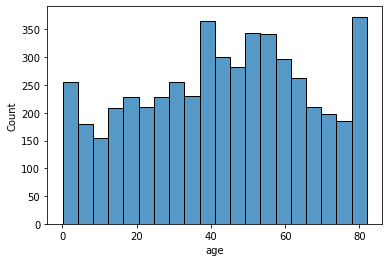

In [12]:
sns.histplot(df['age'])

C:\Users\kefni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

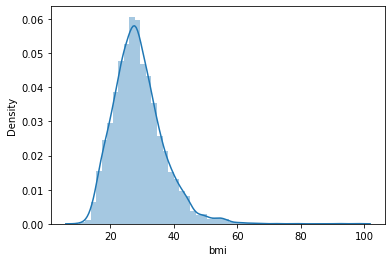

In [13]:
sns.distplot(df['bmi'])

C:\Users\kefni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

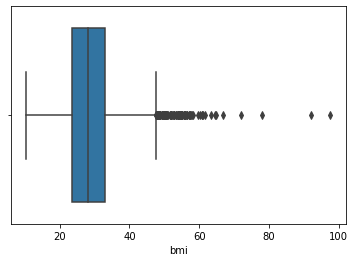

In [14]:
sns.boxplot(df['bmi'])

In [15]:
df['ever_married'].replace("Yes", 1,inplace=True)

In [16]:
df['ever_married'].replace("No",0,inplace=True)

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
df['Residence_type'].replace("Urban", 1,inplace=True)

In [19]:
df['Residence_type'].replace("Rural", 0,inplace=True)

In [20]:
df['urban']=df['Residence_type']

In [21]:
df.drop('Residence_type',axis=1,inplace=True)

In [22]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,urban
0,Male,67.0,0,1,1,Private,228.69,36.6,formerly smoked,1,1
1,Female,61.0,0,0,1,Self-employed,202.21,NaN,never smoked,1,0
2,Male,80.0,0,1,1,Private,105.92,32.5,never smoked,1,0
3,Female,49.0,0,0,1,Private,171.23,34.4,smokes,1,1
4,Female,79.0,1,0,1,Self-employed,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,83.75,NaN,never smoked,0,1
5106,Female,81.0,0,0,1,Self-employed,125.20,40.0,never smoked,0,1
5107,Female,35.0,0,0,1,Self-employed,82.99,30.6,never smoked,0,0
5108,Male,51.0,0,0,1,Private,166.29,25.6,formerly smoked,0,0


In [23]:
df['bmi'].replace(np.nan,1,inplace=True)

In [24]:
df=df[df['bmi']<60]

In [25]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,urban
0,Male,67.0,0,1,1,Private,228.69,36.6,formerly smoked,1,1
1,Female,61.0,0,0,1,Self-employed,202.21,1.0,never smoked,1,0
2,Male,80.0,0,1,1,Private,105.92,32.5,never smoked,1,0
3,Female,49.0,0,0,1,Private,171.23,34.4,smokes,1,1
4,Female,79.0,1,0,1,Self-employed,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,83.75,1.0,never smoked,0,1
5106,Female,81.0,0,0,1,Self-employed,125.20,40.0,never smoked,0,1
5107,Female,35.0,0,0,1,Self-employed,82.99,30.6,never smoked,0,0
5108,Male,51.0,0,0,1,Private,166.29,25.6,formerly smoked,0,0


In [26]:
df['bmi'].replace(1,np.nan,inplace=True)

C:\Users\kefni\AppData\Local\Temp\ipykernel_10272\160782823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'].replace(1,np.nan,inplace=True)


In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,urban
0,Male,67.0,0,1,1,Private,228.69,36.6,formerly smoked,1,1
1,Female,61.0,0,0,1,Self-employed,202.21,NaN,never smoked,1,0
2,Male,80.0,0,1,1,Private,105.92,32.5,never smoked,1,0
3,Female,49.0,0,0,1,Private,171.23,34.4,smokes,1,1
4,Female,79.0,1,0,1,Self-employed,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,83.75,NaN,never smoked,0,1
5106,Female,81.0,0,0,1,Self-employed,125.20,40.0,never smoked,0,1
5107,Female,35.0,0,0,1,Self-employed,82.99,30.6,never smoked,0,0
5108,Male,51.0,0,0,1,Private,166.29,25.6,formerly smoked,0,0


In [28]:
df['bmi'].count()

4896

In [29]:
df=pd.get_dummies(df)

In [30]:
df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,urban,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,202.21,NaN,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,171.23,34.4,1,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,174.12,24.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,NaN,0,1,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,125.20,40.0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,82.99,30.6,0,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,166.29,25.6,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [31]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [32]:
imputer_simple = SimpleImputer(strategy = "mean")
imputed_dt_simple = pd.DataFrame(imputer_simple.fit_transform(X))

imputed_dt_simple

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,67.0,0.0,1.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,1.0,202.21,28.785396,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,1.0,105.92,32.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,1.0,171.23,34.400000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,1.0,174.12,24.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,80.0,1.0,0.0,1.0,83.75,28.785396,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5093,81.0,0.0,0.0,1.0,125.20,40.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5094,35.0,0.0,0.0,1.0,82.99,30.600000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5095,51.0,0.0,0.0,1.0,166.29,25.600000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
X_train_simple, X_test_simple, y_train_simple , y_test_simple = train_test_split(imputed_dt_simple,y,random_state = 42,test_size=0.33,stratify=y)

In [34]:
scaler = StandardScaler().fit(X_train_simple)

X_train_scaled = scaler.transform(X_train_simple)
X_test_scaled = scaler.transform(X_test_simple)

In [35]:
from imblearn.under_sampling import RandomUnderSampler
under_sampling = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = under_sampling.fit_resample(X_train_scaled, y_train_simple)

In [36]:
rf=RandomForestClassifier()

In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
preds=rf.predict(X_test_scaled)

In [39]:
print(classification_report(y_test_simple,preds))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81      1601
           1       0.12      0.82      0.20        82

    accuracy                           0.69      1683
   macro avg       0.55      0.75      0.51      1683
weighted avg       0.94      0.69      0.78      1683



In [40]:
print(confusion_matrix(y_test_simple,preds))

[[1094  507]
 [  15   67]]


In [59]:
rf_tuned=RandomForestClassifier()
param_grid = {'n_estimators': [1000],
               'max_depth': [10],
               'class_weight': [
                                 {1:0.4,0:0.6},
                                ],
              'min_samples_split': [1,2,5,10],
                 'min_samples_leaf' : [2],
              'random_state':[100]
             }

cv=GridSearchCV(estimator=rf_tuned,param_grid=param_grid,scoring='roc_auc',verbose=2,n_jobs=-1)

In [60]:
model_final=cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\kefni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kefni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kefni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\kefni\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\kefni\anaconda3\lib\site-packages\jobl

In [61]:
preds = model_final.predict(X_test_scaled)

In [62]:
print(classification_report(y_test_simple,preds))
print(confusion_matrix(y_test_simple,preds))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1601
           1       0.13      0.82      0.23        82

    accuracy                           0.73      1683
   macro avg       0.56      0.77      0.53      1683
weighted avg       0.95      0.73      0.81      1683

[[1161  440]
 [  15   67]]


In [63]:
model_final.best_score_

0.8386917301355803

# Visualization

In [226]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [286]:
data['work_type'].replace('children',"Children",inplace=True)

In [227]:
lista=[]
for i in range(0,3001,250):
    lista.append(i)

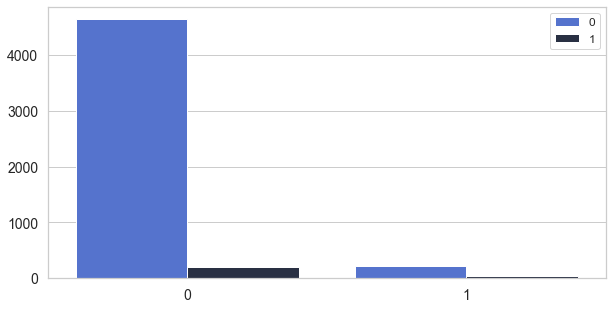

In [320]:
plt.figure(figsize = (10,5))
sns.countplot(data=data,x='heart_disease',hue='stroke',palette=['royalblue','#252e47'])
plt.ylabel('', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',prop={'size': 12})
plt.savefig('heart_disease' ,transparent=True,bbox_inches='tight')
plt.show()


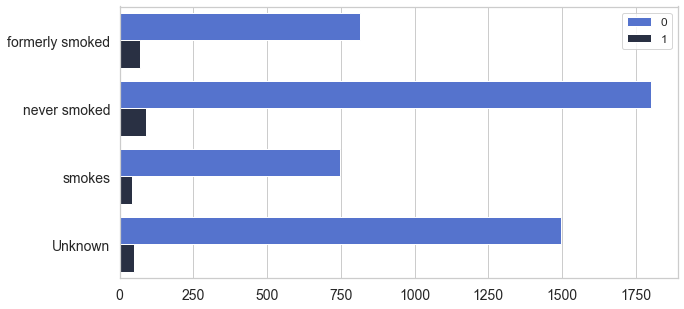

In [340]:
plt.figure(figsize = (10,5))
sns.countplot(data=data,y='smoking_status',hue='stroke',palette=['royalblue','#252e47'])
plt.ylabel('', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',prop={'size': 12})
plt.savefig('stroke_smoke' ,transparent=True,bbox_inches='tight')
plt.show()


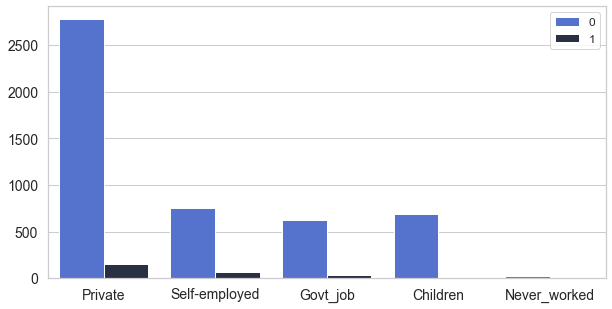

In [288]:
plt.figure(figsize = (10,5))
sns.countplot(data=data,x='work_type',hue='stroke',palette=['royalblue','#252e47'])
plt.ylabel('', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',prop={'size': 12})
plt.savefig('stroke_work' ,transparent=True,bbox_inches='tight')
plt.show()


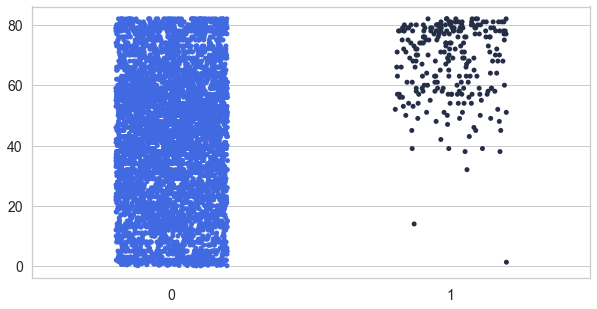

In [273]:
plt.figure(figsize = (10,5))
sns.stripplot(x=data['stroke'],y=data['age'],data=data,jitter=0.2,palette=['royalblue','#252e47'])
plt.ylabel('', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('age_stroke.png' ,transparent=True,bbox_inches='tight')

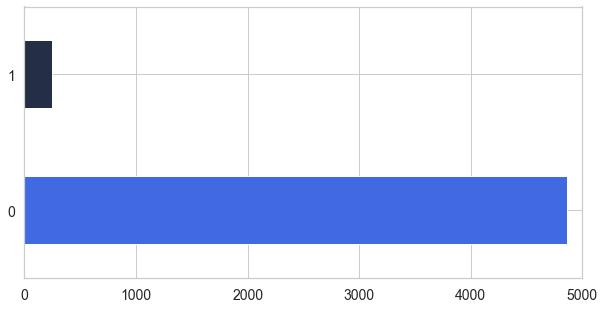

In [258]:
plt.figure(figsize = (10,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,5000)
data['stroke'].value_counts().plot.barh(color=('royalblue','#252e47' ))
plt.savefig('stroke_numberofcand.png' ,transparent=True,bbox_inches='tight')

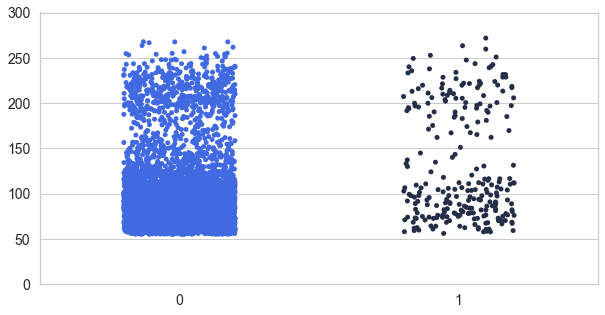

In [275]:
plt.figure(figsize = (10,5))
plt.ylim(0,300)
sns.stripplot(x=data['stroke'],y=data['avg_glucose_level'],data=data,jitter=0.2,palette=['royalblue','#252e47',])
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('glucause_stroke.png' ,transparent=True,bbox_inches='tight')
plt.show()

C:\Users\kefni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

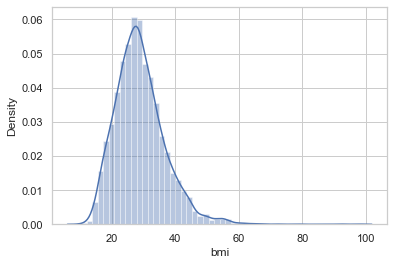

In [276]:
sns.distplot(data['bmi'])

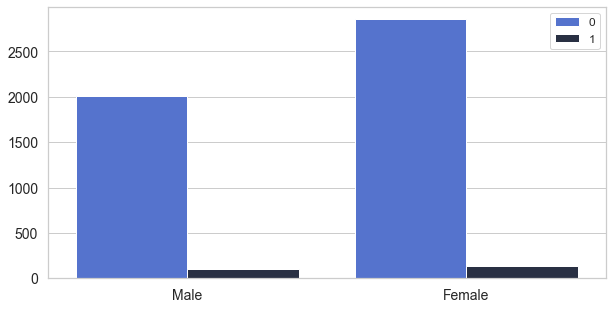

In [316]:

plt.figure(figsize = (10,5))
sns.countplot(x='gender',  data=data[data['gender']!='Other'],hue='stroke',palette=['royalblue','#252e47'])
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',prop={'size': 12})
plt.savefig('strokeovergender.png' ,transparent=True,bbox_inches='tight')
plt.show()

<Figure size 720x360 with 0 Axes>

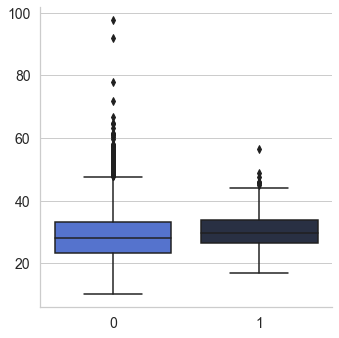

In [310]:
plt.figure(figsize = (10,5))
sns.catplot(x="stroke",y='bmi' ,kind='box', data=data,palette=['royalblue','#252e47'])
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('stroke_bmi.png' ,transparent=True,bbox_inches='tight')
plt.show()